Sentiment analysis on Twitter data - Logistic Regression 
---



Sentiment analysis is utilized in classifying and distingusihing text data into different categories. These categories can be formulated as per the business requirements. Generally for sentiment analysis are distinguised between positive, negative and neutral sentiments.

Utilizing logistic regression, a model can be trained which would be able to predict/classify the sentiments on a sample of tweet. This model can also be generalized over all the tweets. 

Twitter dataset
---

In order to create a logistic regression model, we can use the NLTK dataset is encoded in the Python NLTK library. 


In [8]:
# Importing functions
import nltk                                
from nltk.corpus import twitter_samples    
import matplotlib.pyplot as plt            
import random
import numpy as np
import pandas as pd
import plotly.express as px
!pip install --upgrade "kaleido==0.1.*"
import kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# Sample twitter dataset.
nltk.download('twitter_samples')
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


The dataset consists of two classes i.e. Positive class encoded as label 1 and Negative class encoded as label 0. There are total of 10000 datapoints i.e. 10000 tweets. The classes for this dataset are balanced where both classes have 5000 datapoints each.

In [10]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


In [11]:
import plotly.express as px
fig = px.scatter(px.data.iris(), x="sepal_length", y="sepal_width", color="species")
fig.write_image("figure.png", engine="kaleido")

In [12]:
import plotly.graph_objects as go
colors = ["red", "green"]

fig = go.Figure(data=[go.Pie(labels=['Positives', 'Negative'],
                             values=[len(all_positive_tweets), len(all_negative_tweets)])])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.update_layout(height = 400, width = 500, paper_bgcolor="#D3D3D3", title= {
        'text': "Sentiment Class Distribution",
        'y':0.9,
        'x':0.46,'xanchor': 'center',
        'yanchor': 'top'})
fig.write_image("distribution.png", "png")

fig.show()

To visualize how the data itself looks like four samples from both classes have been extracted. The tweets consists of strings, numbers, URLs, hashtags, punctuations and emojis. To make the logistic regression model more accurate we would need to preprocess the data and remove certain features that do not help in making predictions or do not add any meaning to sentiment analysis. 

In [43]:
import sys
from termcolor import colored, cprint
text = colored(all_positive_tweets[random.randint(0,5000)], 'green', attrs=['reverse', 'blink'])
text_2 = colored(all_positive_tweets[random.randint(0,5000)], 'green', attrs=['reverse', 'blink'])
text_3 = colored(all_negative_tweets[random.randint(0,5000)], 'red', attrs=['reverse', 'blink'])
text_4 = colored(all_negative_tweets[random.randint(0,5000)], 'red', attrs=['reverse', 'blink'])
print(f"First positive Tweet sample:\n{text}\n Second positive Tweet sample:\n{text_2}")
print(f"First negative Tweet sample:\n{text_3}\n Second negative Tweet sample:\n{text_4}")

First positive Tweet sample:
@vickybeeching congratulations, really looking forward to the book and some good Sunday morning viewing. That's an awesome teapot BTW :-) x
 Second positive Tweet sample:
Hi BAM ! @BarsAndMelody 
Can you follow my bestfriend @969Horan696 ? 
She loves you a lot :) 
See you in Warsaw &lt;3 
Love you &lt;3 x43
First negative Tweet sample:
#PKwalaSawaal  when will India  become a developed nation :( ? @SonyMAX
 Second negative Tweet sample:
I miss my boyfriend :-(


Data preprocessing
---
Data preprocessing in NLP involves removing certain features that do not add any value for to the model. In case of sentiment analysis they would include
1. Removing punctuations
2. Removing stop words 
3. Tokenization 
4. Words stemming
5. Removing hashtags (#) and URLs in case of twitter data.
6. Word lowercasing 


The following sample tweets will be processed to exactly see how they would be represented as vector in the end for the logistic regression. In the first step hashtags and URLs can be removed such that the next preprocessing steps become much easier. 

In [14]:
tweet = all_positive_tweets[2277]
tweet_2 = all_positive_tweets[2267]
print(f"Tweet 1:\n{tweet}\n\nTweet_2:\n{tweet_2}")

Tweet 1:
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

Tweet_2:
We like to keep students busy with practicing and using English in proactive environment. :)


In [15]:
# Package imports for preprocessing
nltk.download('stopwords')

import re                                  # library for Regex operations
import string                              # library string operations
from nltk.corpus import stopwords          # Module that consists of stop words 
from nltk.tokenize import TweetTokenizer   # Module for tokenization and stemming

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Normalization of tweet text to modern format
conv_tweet = re.sub(r'^RT[\s]+', '', tweet)
conv_tweet_2 = re.sub(r'^RT[\s]+', '', tweet_2)

# Removes hyperlinks
conv_tweet = re.sub(r'https?://[^\s\n\r]+', '', conv_tweet)
conv_tweet_2 = re.sub(r'https?://[^\s\n\r]+', '', conv_tweet_2)

# Removes hashtags (Note - only removing the # sign from the tweet and not the word attached to the hash)
conv_tweet = re.sub(r'#', '', conv_tweet)
conv_tweet_2 = re.sub(r'#', '', conv_tweet_2)

print('\033[1m' + "Original Tweets")
print('\033[0m' + tweet)
print('\033[0m' + tweet_2 + "\n")
print('\033[96m' + "Converted Tweets")
print('\033[96m' + conv_tweet)
print('\033[96m' + conv_tweet_2)

Original Tweets
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
We like to keep students busy with practicing and using English in proactive environment. :)

Converted Tweets
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 
We like to keep students busy with practicing and using English in proactive environment. :)


Next step is to tokenize the tweets. Meaning each word in the tweet will be seperated and be inserted into a list. This will help in removal of punctuations, removal of stop words and stemming. 

Lower casing all the words also helps reduce the size of the vocabulary i.e. the number of unique words in the entire training data. Words like "Great", "great" and "GREATE" will all be reduced to the word "great". In python these words/strings are treated seperately. Hence lower casing will help resolve these issues.

In [17]:
print('\033[96m')
print("Converted Tweets:")
print('\033[96m' + conv_tweet)
print('\033[96m' + conv_tweet_2)

# Instantiation of tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# Tokenizing tweets
tweet_tokens = tokenizer.tokenize(conv_tweet)
tweet_tokens_2 = tokenizer.tokenize(conv_tweet_2)
print('\033[92m')
print('Tokenized strings:')
print(tweet_tokens)
print(tweet_tokens_2)


Converted Tweets:
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 
We like to keep students busy with practicing and using English in proactive environment. :)

Tokenized strings:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
['we', 'like', 'to', 'keep', 'students', 'busy', 'with', 'practicing', 'and', 'using', 'english', 'in', 'proactive', 'environment', '.', ':)']


Stop words are words in any language that fail to give any contextual meaning to the sentences. In case of sentiment analysis of twitter data they fail to provide any value to indication of the sentiment. Removing them will reduce the size of the vocabulary which would be later used to create a feature dictionary; Ultimately, reducing training and prediction time. For this analysis, stop words from the NLTK library are sufficient. It is important to note that it is not always beneficial to remove all stop words. Words like "not" and "shouldn't" sometimes contribute towards ascertaining the sentiment of a tweet. For this base analysis, all stop words will be removed. The list of stops words can be amended after visualizing the count feature vectors of all the tweets in a 2D plane and after cross-validation. In the NLTK library there are 179 total stops words.

Similarly, punctuations can be removed from the tweets. Like stop words they also do not provide significant contribution towards sentiment analysis. Some punctuations like "!" and conjoined punctuations like ":)" which are used in replacement of emojis should be retained for sentiment analysis of twitter data. To know which punctuations should be removed can be ascertained after visualizing the un-processed data and finding out if they are giving any context to the data. Furthermore, they can also be visualized in a 2D plane of the feature count where a high usage in the data would indicate towards retaning them. Cross-validation would also help in providing more clarity. 

In the NLTK library there are 179 total stops words and the punctuations which will be extracted from the string package. 

In [18]:
# Import of english stop words from NLTK
stopwords_english = stopwords.words('english') 

print("Total Stop Words:",len(stopwords_english),"\n\n",stopwords_english[0:21],"\n",stopwords_english[21 : 44],"\n",stopwords_english[44 : 66],"\n",stopwords_english[66 : 88],"\n",stopwords_english[88 : 110],
      "\n",stopwords_english[110 : 132],"\n",stopwords_english[132 : 154],"\n",stopwords_english[154 : 170],"\n",stopwords_english[170 : 178])

# Punctiations from the string library
print('\nPunctuations\n')
print(string.punctuation)

Total Stop Words: 179 

 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself'] 
 ['she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those'] 
 ['am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if'] 
 ['or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from'] 
 ['up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each'] 
 ['few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not'

Processed sample data after removal of punctuations and stop words

In [19]:
print('\033[92m' + "Tokenized Strings:")
print(tweet_tokens)
print(tweet_tokens_2)

tweets_clean = [[], []]

for i, tweet_list in enumerate([tweet_tokens, tweet_tokens_2]): 
  for word in tweet_list:
    if (word not in stopwords_english and  
        word not in string.punctuation):  
        tweets_clean[i].append(word)

print('\033[33m')
print('Removed stop words and punctuation:')
print(f"Tweet 1\n{tweets_clean[0]}\nTweet 2\n{tweets_clean[1]}")

Tokenized Strings:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
['we', 'like', 'to', 'keep', 'students', 'busy', 'with', 'practicing', 'and', 'using', 'english', 'in', 'proactive', 'environment', '.', ':)']

Removed stop words and punctuation:
Tweet 1
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
Tweet 2
['like', 'keep', 'students', 'busy', 'practicing', 'using', 'english', 'proactive', 'environment', ':)']


Stemming involves processing each word and converting it to its base stem. Words like "eats", "eaten" and "eating" are converted to base stem "eat". This helps in reducing the size of the vocabulary. A smaller dictionary helps in faster training and predictions.

In [20]:
print('\033[33m')
print("Pre Stemming:")
print(tweets_clean[0])
print(tweets_clean[1])


# Instantiate stemming class
from nltk.stem import PorterStemmer
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [[],[]] 

for i, element in enumerate(tweets_clean):
  for word in element:
    stem_word = stemmer.stem(word)  
    tweets_stem[i].append(stem_word)  

print('\033[97m')
print('Post Stemming:')
print(f"Tweet 1\n{tweets_stem[0]}\nTweet 2\n{tweets_stem[1]}")


Pre Stemming:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
['like', 'keep', 'students', 'busy', 'practicing', 'using', 'english', 'proactive', 'environment', ':)']

Post Stemming:
Tweet 1
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
Tweet 2
['like', 'keep', 'student', 'busi', 'practic', 'use', 'english', 'proactiv', 'environ', ':)']


A [custom function](https://gist.github.com/pinarkaymaz6/8d843e20defc73be1146da2a5d04696f) has been imported from git hub to pre-process all the tweets in the twitter dataset where all the preprocessing steps will be performed in one go. 

In [21]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

The "build_freqs" function will be used in lieu of the "process_tweets" function. The reason for using this is to build a frequency count i.e. the number of times the unique word in our vocabulary has been used in the entire twitter data. This would help us to encode each tweet into a feature vector of size 3. Note: the vocabulary from only the training data would be used in the end rather than the entire data.

In [22]:
import numpy as np

def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [23]:
# Concatenation of lists i.e. the positive and negative tweets lists
tweets = all_positive_tweets + all_negative_tweets

print("Number of tweets: ", len(tweets))

Number of tweets:  10000


The corresponding label of each tweet i.e. 1 or 0 will be appended to each tweet

In [24]:
# Numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

The number of unique words in the vocabulary amount to 13067 for all 10000 tweets i.e. entire training data.

In [25]:
# Vocabulary and frequency dictionary
freqs = build_freqs(tweets, labels)

print(f'type(freqs) = {type(freqs)}')

print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13067


A frqeuency dictionary consists of each unique word from the vocabulary and the number of times it has been used in the positive and negatives tweets. The format of an individual list/word is ["word", Positive count, Negative count"]. Utilizing this dictionary each tweet can be converted to a feature of size 3. 

This freqeuency dictionary can be plotted on a scatter plot to see the distribution of word count for both classes. If a certain word is used more in one class indicates that it might contribute towards ascertaining the sentiment of a tweet. For visual representation a sample of words have been selected which either have a high frequency count in either one class or another. Some words which have a balanced frequency among classes have also been selected. Balanced frequencies indicate neutral words which do not points towards a certain sentiment. 

In [26]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific', "thank", "day", "like", "pleas", "love", ":d", "..."]

data = []

for word in keys:
    pos = 0
    neg = 0
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
    data.append([word, pos, neg])
    
data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0],
 ['thank', 620, 107],
 ['day', 246, 149],
 ['like', 233, 228],
 ['pleas', 97, 275],
 ['love', 400, 152],
 [':d', 629, 0],
 ['...', 289, 331]]

The log distribution represents the how many times have the words been used in their corresponding classes. The scatter plot has been logged to plot the data on same ranges on X and Y axis. Words or symbols like ":)" and ":d" indicate that they might contribute towards a tweet being postive when passes through logistic regression. Words or symbols like ":(" or "sad" have been used more in the negative class. Indicating that they might increase the probability of a certain being negative.

This method can also be used to filter out neutral words from the vocabulary which have been used at almost the same frequency in the positive and negative classes. Words at or near the red line are such words. Neutral words do not contribute towards pointing towards a certain sentiment. 

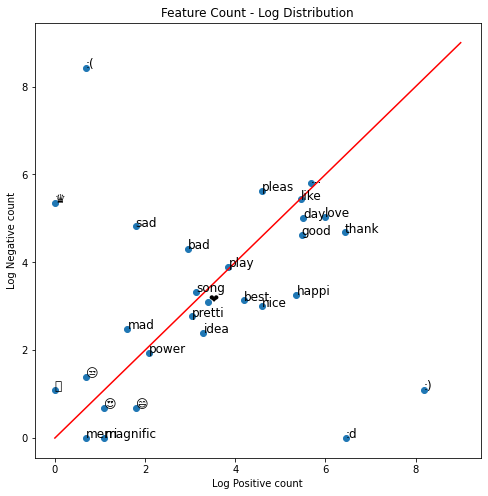

In [27]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize = (8, 8))

x = np.log([x[1] + 1 for x in data])  
y = np.log([x[2] + 1 for x in data]) 
ax.scatter(x, y)  

plt.title("Feature Count - Log Distribution")
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') 
plt.show()

Training
---

For classification logistic regression can be used to give a baseline for sentiment analysis. Data will be split 80/20 i.e. 8000 tweets for training and 2000 cross-validation. 

Best weights that should be used for three features can be figured out by applying gradient descent. The first feature will be for the bias, second will be for the positive class and third will be for the negative class. The weights will be initialized with a random normal distribution and updated after every computation of cost function with respect to the weights. The weights with the lowest cost function will be used as the final weights for logistic regression and cross-validation. 

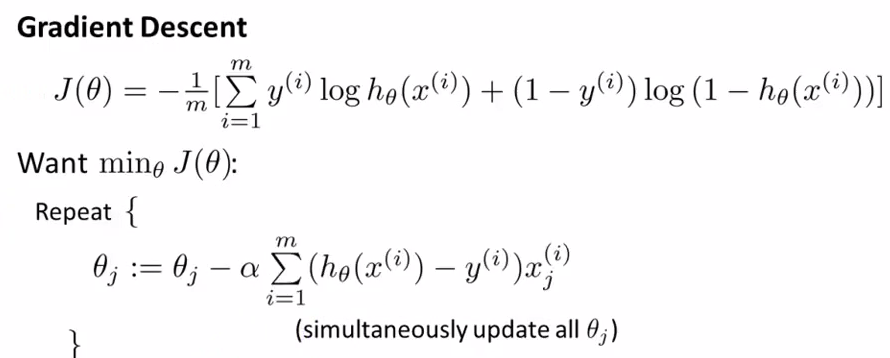

In [28]:
# Data split into 80/20
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

New frequency dictionary has been generated by only using the 8000 tweets from the training data. The unique number of words in the vocabulary have now reduced to 11338.

In [29]:
# Frequency dictionary
freqs = build_freqs(train_x, train_y)

print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11338


In [30]:
import math
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    h = 1 / (1 + np.exp(-z))
    return h

In [31]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    '''
    m = len(x)
    
    for i in range(0, num_iters):
        z = np.dot(x, theta)
        h = sigmoid(z)
        J = (-1/m ) * (np.dot(np.transpose(y), np.log(h)) + np.dot((np.transpose(1 - y)), np.log(1 - h)))
        theta = theta - ((alpha/m) * np.dot(np.transpose(x), (h - y)))
    J = float(J)
    return J, theta

In [32]:
def extract_features(tweet, freqs, process_tweet=process_tweet):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    word_l = process_tweet(tweet)
    x = np.zeros((1, 3)) 
    x[0,0] = 1 
    for word in word_l:
        x[0,1] += freqs.get((word, 1.0), 0)
        x[0,2] += freqs.get((word, 0.0), 0)
    assert(x.shape == (1, 3))
    return x

1500 iterations of gradient descent have been performed and learning rate is has been set to 1e-9. After computation, the weights for the three features have resulted in     [7e-08, 0.00052391, -0.00055517] for the whole training set.

In [33]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

Y = train_y

J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.24215474.
The resulting vector of weights is [7e-08, 0.00052391, -0.00055517]


Prior to performing cross-validation the weights and the corresponding training data can be visualized on a 2D plane to see how accurately the weights are able to ascertain the split of the training data. This visualization also provides how well the features from the frquency dictionary are able to split the data in their corresponding sentiments. 


In [34]:
bias_pos_neg_label = []
for i, element in enumerate(X):
  bias_pos_neg_label.append(np.append(element, Y[i]))

bias, positive, negative, sentiment = zip(*bias_pos_neg_label)
bias = list(bias)
positive = list(positive)
negative = list(negative)
sentiment = list(sentiment)

In the dataframe below each tweet has been represented with a length of size 3. Where the first is the bias, second is the unique count of postive class and third is the unique count of negative class. The last column can be used to represent if the sentiment for a tweet is positive or negative. 

In [35]:
df = pd.DataFrame(list(zip(bias, positive, negative, sentiment)),
               columns =['Bias', 'Positive', "Negative", "Sentiment"])

df.head(10)

,Bias,Positive,Negative,Sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,265.0,112.0,1.0


Same representation as above but different format. 

In [36]:
X = df[['Bias', 'Positive', 'Negative']].values 
Y = df['Sentiment'].values;

print(X.shape) 
print(X)

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


As seen from the plot each tweet has been seperated perfectly by using the current features from the vocabulary. Tweets which are negative have a high frequency of negative counts and vice versa.

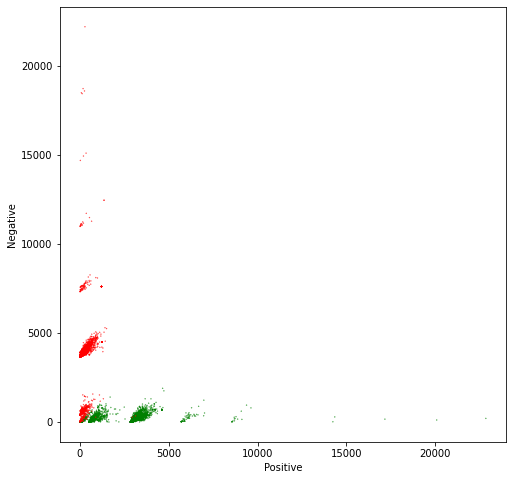

In [37]:
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # red is negative while green is positive

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  
plt.xlabel("Positive")
plt.ylabel("Negative")
plt.show()

In [38]:
theta = [7e-08, 0.00052391, -0.00055517]

def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

def direction(theta, pos):
    return    pos * theta[2] / theta[1]

The grey line indicates the seperation of the plane where the tweets are classified either 0 or 1 by the logistic regression with the current weights. The model has been able to ascertain accurate weights with the existing features. 

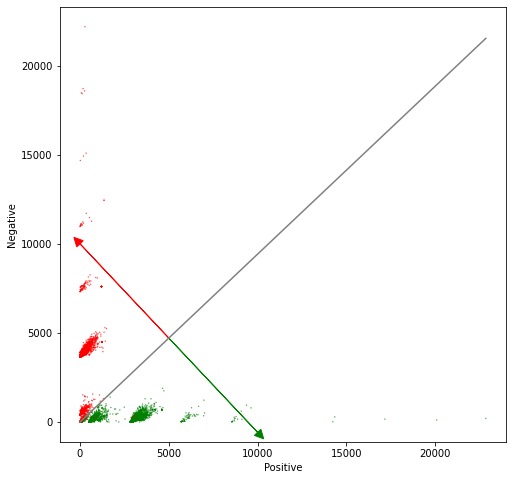

In [39]:
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

maxpos = np.max(X[:,1])

offset = 5000 

ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()

Cross-validation
---

Cross-validation is a crucial step in machine learning and same is the case with NLP. It is used to figure out how generalizable a trained model is on unknown data. Model underfit or overfit can also be deduced if cross-validation results are low. 

Cross-validation metric i.e. Accuracy is being used to assess the how good the model is. Logistic regression produces a probability of a given tweet being 1 where 1 represents tweet being positive. The threshold can be changed as per the business question. For this analysis the threshold has been set to 0.5. Where probability of above 0.5 will be classified as a positive tweet and vice versa. 

The formula for accuracy is 

[accuracy = correct_predictions / total_predictions]

[correct_predictions = sum(true label - predicted label)]

In [40]:
# Function to generate prediction of a tweet 
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    x = extract_features(tweet, freqs)

    y_pred = sigmoid(np.dot(x, theta))
    
    return y_pred

In [41]:
def test_logistic_regression(test_x, test_y, freqs, theta, predict_tweet=predict_tweet):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    y_hat = []
    
    for tweet in test_x:
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            y_hat.append(1.0)
        else:
            y_hat.append(0.0)

    accuracy = sum((y_hat == np.squeeze(test_y))) / len(test_x)
    
    return accuracy

Results
---

The model with the existing features and weights has been able to obtain 99.50% accuracy on the validation set which is extremely high. Meaning that it has been able to classify 99.50% of the validation tweets to their true sentiments. 


In [42]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy * 100:.2f}%")

Logistic regression model's accuracy = 99.50%
